**Customer Segmentation**


In [158]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns


In [159]:
# Load the dataset
df = pd.read_csv('csv.csv')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263482 entries, 0 to 263481
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ent                     263482 non-null  object 
 1   original_status         263482 non-null  object 
 2   join_month              263482 non-null  int64  
 3   join_year               263482 non-null  int64  
 4   tenure                  263482 non-null  int64  
 5   sponsor                 263482 non-null  object 
 6   no_downline             263482 non-null  float64
 7   payment_date_last       263482 non-null  object 
 8   recency                 263482 non-null  object 
 9   last_center             263482 non-null  object 
 10  total_amount_sum        263482 non-null  float64
 11  frequency               263482 non-null  int64  
 12  avg_trx                 263482 non-null  float64
 13  discount_sum            263464 non-null  float64
 14  disc_trx_count      

In [161]:
df.describe()

,join_month,join_year,tenure,no_downline,total_amount_sum,frequency,avg_trx,discount_sum,disc_trx_count,disc_total_trx,paid_amount_sum,paid_per_amount,monetary,paid_trx_count,paid_per_amount_trx
count,263482.000000,263482.000000,263482.000000,263482.000000,2.634820e+05,263482.000000,2.634820e+05,2.634640e+05,263482.000000,263482.000000,2.634820e+05,263425.000000,2.634820e+05,263482.000000,263482.0
mean,6.551002,2021.400342,1.599658,0.972901,4.059498e+06,4.709935,1.134466e+06,1.685536e+05,1.577546,32.722871,4.038540e+05,8.645440,4.038540e+05,4.709935,100.0
std,3.291331,1.927034,1.927034,4.733396,7.239326e+06,9.542241,6.439605e+05,4.572447e+05,4.046514,39.382727,1.466093e+06,23.906568,1.466093e+06,9.542241,0.0
min,1.000000,1987.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,100.0
25%,4.000000,2021.000000,1.000000,0.000000,1.589000e+06,1.000000,6.276182e+05,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,100.0
50%,6.000000,2022.000000,1.000000,0.000000,1.753250e+06,2.000000,9.810000e+05,2.500000e+03,1.000000,9.090909,0.000000e+00,0.000000,0.000000e+00,2.000000,100.0
75%,9.000000,2022.000000,2.000000,0.000000,3.215500e+06,4.000000,1.625000e+06,1.700000e+05,1.000000,60.000000,0.000000e+00,0.000000,0.000000e+00,4.000000,100.0
max,12.000000,2023.000000,36.000000,916.000000,1.332830e+08,574.000000,1.623700e+07,1.172250e+07,122.000000,100.000000,5.010950e+07,100.000000,5.010950e+07,574.000000,100.0


In [162]:
# Change data type of 'recency' and 'payment_date_last' to datetime
df['recency'] = pd.to_datetime(df['recency'])
df['payment_date_last'] = pd.to_datetime(df['payment_date_last'])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263482 entries, 0 to 263481
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   ent                     263482 non-null  object             
 1   original_status         263482 non-null  object             
 2   join_month              263482 non-null  int64              
 3   join_year               263482 non-null  int64              
 4   tenure                  263482 non-null  int64              
 5   sponsor                 263482 non-null  object             
 6   no_downline             263482 non-null  float64            
 7   payment_date_last       263482 non-null  datetime64[ns, UTC]
 8   recency                 263482 non-null  datetime64[ns, UTC]
 9   last_center             263482 non-null  object             
 10  total_amount_sum        263482 non-null  float64            
 11  frequency               26

In [164]:
df.tail()

,ent,original_status,join_month,join_year,tenure,sponsor,no_downline,payment_date_last,recency,last_center,...,avg_trx,discount_sum,disc_trx_count,disc_total_trx,paid_amount_sum,paid_per_amount,monetary,paid_trx_count,paid_per_amount_trx,last_trans_origin_type
263477,HCQRRE40,-,3,2022,1,HCQR1JRP,0.0,2022-03-12 00:00:00+00:00,2022-03-12 00:00:00+00:00,TKCE1J,...,117000.0,0.0,0,0.0,0,0.000000,0,1,100.0,online
263478,HCQRRQCF,A,8,2022,1,TCCEJCZ11ZY,0.0,2022-08-27 00:00:00+00:00,2022-08-27 00:00:00+00:00,TYCE3R,...,829000.0,0.0,0,0.0,0,0.000000,0,1,100.0,offline
263479,HCQRR33U,-,5,2022,1,H4CCCCCF,0.0,2022-11-23 00:00:00+00:00,2022-11-23 00:00:00+00:00,TKC14R,...,1182000.0,0.0,0,0.0,0,0.000000,0,2,100.0,online
263480,HCQRR3ZB,A,9,2022,1,TCCER1WQWEU,0.0,2022-09-29 00:00:00+00:00,2022-09-29 00:00:00+00:00,TYCR44,...,911000.0,41500.0,1,100.0,869500,95.444566,869500,1,100.0,online
263481,H4C4W31K,I,5,1987,36,H4C4WRQY,0.0,2022-08-15 00:00:00+00:00,2022-08-15 00:00:00+00:00,TSCCEZ,...,390000.0,0.0,0,0.0,0,0.000000,0,1,100.0,offline


In [165]:
# Encoding 'original_status' and 'last_trans_origin_type' columns
label_encoder = LabelEncoder()
df['original_status'] = label_encoder.fit_transform(df['original_status'])
df['sponsor'] = label_encoder.fit_transform(df['sponsor'])
df['last_trans_origin_type'] = label_encoder.fit_transform(df['last_trans_origin_type'])


In [166]:
# Create a DataFrame 'df_features' containing all columns except 'ent' and non-numeric columns
df_features = df.drop(columns=['ent', 'payment_date_last', 'recency', 'last_center'])


In [167]:
df_features

,original_status,join_month,join_year,tenure,sponsor,no_downline,total_amount_sum,frequency,avg_trx,discount_sum,disc_trx_count,disc_total_trx,paid_amount_sum,paid_per_amount,monetary,paid_trx_count,paid_per_amount_trx,last_trans_origin_type
0,0,3,2015,8,60131,0.0,149000.0,1,1.490000e+05,0.0,0,0.000000,149000,100.000000,149000,1,100.0,0
1,2,1,2021,2,10966,1.0,521000.0,1,5.210000e+05,0.0,0,0.000000,0,0.000000,0,1,100.0,1
2,7,3,2021,2,10966,3.0,8319600.0,12,6.933000e+05,611500.0,2,16.666667,2417600,29.059089,2417600,12,100.0,0
3,1,4,2021,2,4051,0.0,1577500.0,3,5.258333e+05,0.0,0,0.000000,0,0.000000,0,3,100.0,1
4,4,5,2021,2,12,2.0,1993000.0,2,9.965000e+05,0.0,0,0.000000,238000,11.941796,238000,2,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263477,0,3,2022,1,87,0.0,117000.0,1,1.170000e+05,0.0,0,0.000000,0,0.000000,0,1,100.0,1
263478,1,8,2022,1,42460,0.0,829000.0,1,8.290000e+05,0.0,0,0.000000,0,0.000000,0,1,100.0,0
263479,0,5,2022,1,69,0.0,2364000.0,2,1.182000e+06,0.0,0,0.000000,0,0.000000,0,2,100.0,1
263480,1,9,2022,1,52557,0.0,911000.0,1,9.110000e+05,41500.0,1,100.000000,869500,95.444566,869500,1,100.0,1


In [168]:
# Check for missing values in each column
missing_columns = df_features.columns[df_features.isnull().any()]

# Print the columns with missing values and the count of missing values in each
for col in missing_columns:
    missing_count = df_features[col].isnull().sum()
    print(f"Column '{col}' has {missing_count} missing values.")


Column 'discount_sum' has 18 missing values.
Column 'paid_per_amount' has 57 missing values.


In [169]:
# Drop rows with missing values
df_features = df_features.dropna()

In [170]:
# Select numeric columns for standardization, excluding the ones that were encoded
numeric_columns = df_features.select_dtypes(include=['number']).drop(columns=['original_status', 'sponsor', 'last_trans_origin_type'])

# Standardize only the numeric features
scaler = StandardScaler()
df_features[numeric_columns.columns] = scaler.fit_transform(df_features[numeric_columns.columns])


<ipython-input-170-a5c77773bb7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[numeric_columns.columns] = scaler.fit_transform(df_features[numeric_columns.columns])


In [171]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263407 entries, 0 to 263481
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   original_status         263407 non-null  int64  
 1   join_month              263407 non-null  float64
 2   join_year               263407 non-null  float64
 3   tenure                  263407 non-null  float64
 4   sponsor                 263407 non-null  int64  
 5   no_downline             263407 non-null  float64
 6   total_amount_sum        263407 non-null  float64
 7   frequency               263407 non-null  float64
 8   avg_trx                 263407 non-null  float64
 9   discount_sum            263407 non-null  float64
 10  disc_trx_count          263407 non-null  float64
 11  disc_total_trx          263407 non-null  float64
 12  paid_amount_sum         263407 non-null  float64
 13  paid_per_amount         263407 non-null  float64
 14  monetary            

In [172]:
df_features.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         original_status  join_month  join_year  tenure  sponsor  no_downline  \
0                 False       False      False   False    False        False   
1                 False       False      False   False    False        False   
2                 False       False      False   False    False        False   
3                 False       False      False   False    False        False   
4                 False       False      False   False    False        False   
...                 ...         ...        ...     ...      ...          ...   
263477            False       False      False   False    False        False   
263478            False       False      False   False    False        False   
263479            False       False      False   False    False        False   
263480            False       False      False   False    False        False   
263481            False       False      False   False    

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

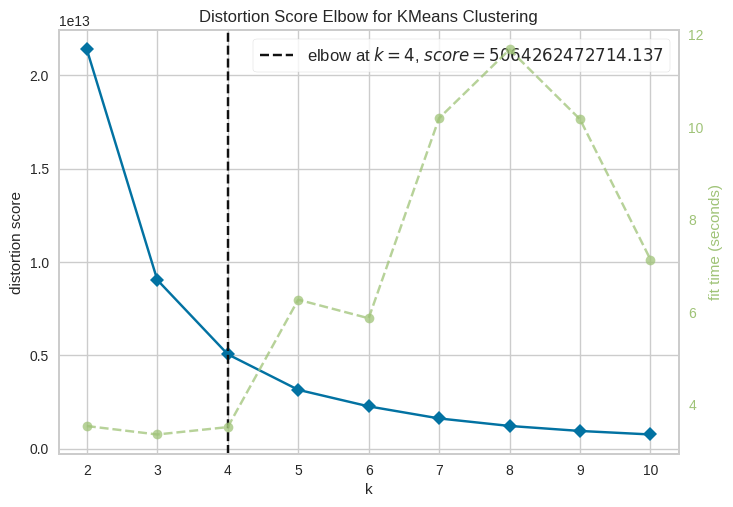

In [173]:
# elbow method to find numbers of clusters.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=158), k=10, scoere='calinski_harabasz')
Elbow_M.fit(df_features)
Elbow_M.show();

In [174]:
# Initialize the K-means Clustering model with the desired number of clusters
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=666)

# Fit the model and predict cluster labels
yhat_KM = km.fit_predict(df_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [175]:
# Create a new DataFrame with the cluster labels
clustered_df = pd.DataFrame(df_features, columns=df_features.columns)
clustered_df["Clusters"] = yhat_KM

# Adding the "Clusters" feature to the original DataFrame
df["Clusters"] = clustered_df["Clusters"]

In [176]:
# Calculate Silhouette Coefficient
score = silhouette_score(df_features, yhat_KM)
print(f"For k={n_clusters}, the Silhouette Coefficient is {score:.2f}")

For k=4, the Silhouette Coefficient is 0.59


In [177]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df_features)
PCA_ds = pd.DataFrame(pca.transform(df_features), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,263407.0,-9.042499e-13,18230.317043,-27273.162099,-16466.162043,-2253.161999,15588.338012,32857.837963
PC2,263407.0,1.622821e-16,2.546843,-2.624140,-1.165523,-0.668268,0.174850,60.652929


In [178]:
PCA_ds["Clusters"] = yhat_KM

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


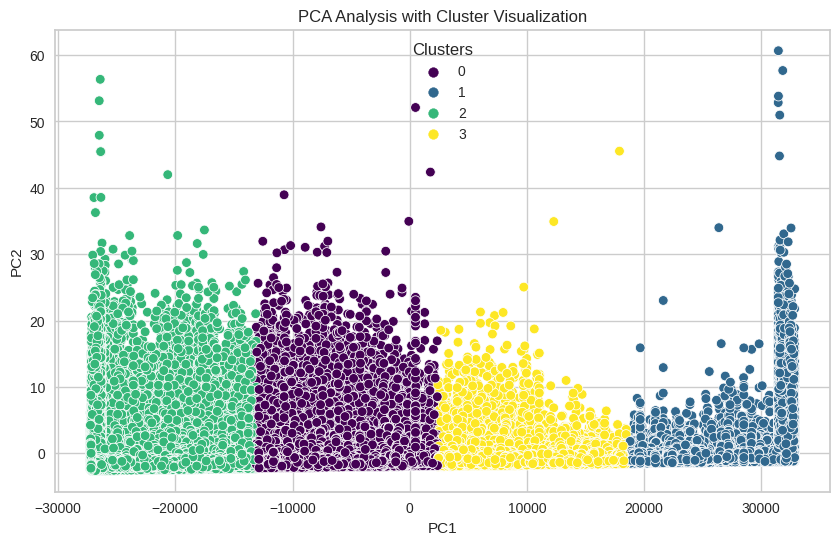

In [179]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Clusters', data=PCA_ds, palette='viridis')
plt.title('PCA Analysis with Cluster Visualization')
plt.show()

In [180]:
cluster_results = df

In [181]:
cluster_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263482 entries, 0 to 263481
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   ent                     263482 non-null  object             
 1   original_status         263482 non-null  int64              
 2   join_month              263482 non-null  int64              
 3   join_year               263482 non-null  int64              
 4   tenure                  263482 non-null  int64              
 5   sponsor                 263482 non-null  int64              
 6   no_downline             263482 non-null  float64            
 7   payment_date_last       263482 non-null  datetime64[ns, UTC]
 8   recency                 263482 non-null  datetime64[ns, UTC]
 9   last_center             263482 non-null  object             
 10  total_amount_sum        263482 non-null  float64            
 11  frequency               26

In [182]:
sku_count = cluster_results.groupby('Clusters')['ent'].nunique()
print(sku_count)

Clusters
0.0    72077
1.0    56047
2.0    80523
3.0    54760
Name: ent, dtype: int64


In [183]:

# Extract the 'ent' and 'Cluster' columns
extracted_df = cluster_results[['ent', 'Clusters']]

# Rename the 'Cluster' column to 'Cluster_21'
extracted_df = extracted_df.rename(columns={'Clusters': 'Cluster_21'})

# Print the extracted DataFrame
extracted_df.tail()

,ent,Cluster_21
263477,HCQRRE40,2.0
263478,HCQRRQCF,3.0
263479,HCQRR33U,2.0
263480,HCQRR3ZB,1.0
263481,H4C4W31K,2.0


In [184]:
cluster_results.to_csv('cluster_results.csv')

            Feature  Importance
4           sponsor    0.869401
2         join_year    0.030807
3            tenure    0.028743
1        join_month    0.020868
6  total_amount_sum    0.010143
8           avg_trx    0.009037
0   original_status    0.006365


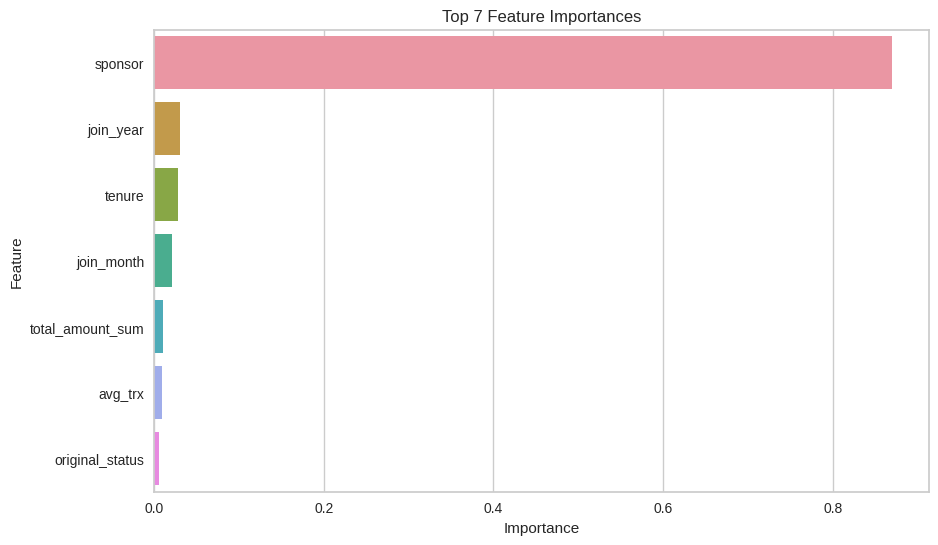

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values
cluster_results.dropna(inplace=True)

# Drop non-numeric columns from X
X = cluster_results.drop(['ent', 'Clusters', 'recency', 'payment_date_last', 'last_center'], axis=1)

# Create variable
y = cluster_results['Clusters']

# Split the data into training and testing sets (40% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Initialize a StandardScaler to scale the features
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize a RandomForestClassifier (you can choose other tree-based models)
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 7 features by importance
top_7_features = feature_importance_df.head(7)

# Print or visualize the top 7 feature importance scores
print(top_7_features)

# You can also plot the top 7 feature importances for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_7_features)
plt.title('Top 7 Feature Importances')
plt.show()
